# Binary Classification if the Loan is paid off?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, log_loss

In [2]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


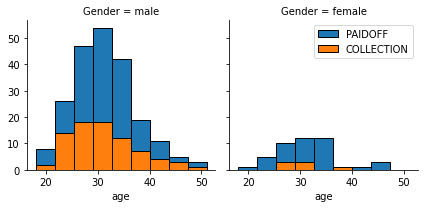

In [5]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

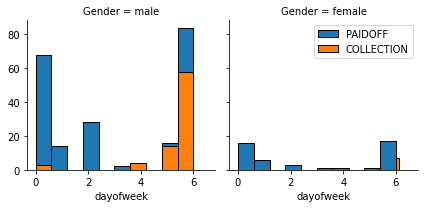

In [6]:
'''relation with day of the week?'''
df['dayofweek'] = df['effective_date'].dt.dayofweek
g = sns.FacetGrid(df, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'dayofweek', ec="k")
g.axes[-1].legend()
plt.show()

In [7]:
# df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [8]:
print(df.isnull().sum())

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dayofweek         0
dtype: int64


### Dummy Variables

In [9]:
la_Gender = preprocessing.LabelEncoder()
la_Gender.fit(['male','female'])
df['Gender'] = la_Gender.transform(df['Gender'])
df['loan_status'].unique()

#dummies or encoding!
la_loan_status = preprocessing.LabelEncoder()
la_loan_status.fit(['PAIDOFF','COLLECTION'])
df['loan_status'] = la_loan_status.transform(df['loan_status'])

#Dummy Variables'''
df['education'].unique()
cat_feat=['education']
df=pd.get_dummies(df, columns=cat_feat, drop_first=True)

In [10]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,dayofweek,education_High School or Below,education_Master or Above,education_college
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,1,3,1,0,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,0,3,0,0,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,1,3,0,0,1
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,0,4,0,0,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,1,4,0,0,1


### Define Feature and Split Data

In [11]:
features=df[['Principal','terms','age','Gender','dayofweek','education_High School or Below', 'education_college']]
labels=df['loan_status']

### Normalized Data

In [12]:
features = StandardScaler().fit(features).transform(features.astype(float))

#to data frame if necessory:
#features=pd.DataFrame(features, columns=df.columns[:-1])

In [13]:
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.8, random_state=42)

# KNN



Minimum error:- 0.23465703971119134 at K = 18


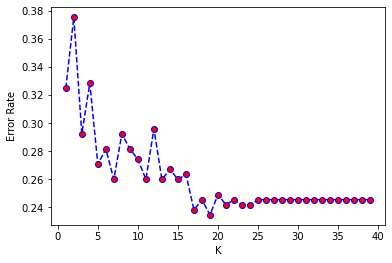

In [14]:
krange=range(1,40)

error_rate=[]
for i in krange:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test.values.ravel()))
    
plt.figure(figsize=(6,4))
plt.plot(krange, error_rate, color='blue', ls='--', marker='o', markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [15]:
Ks = 40
mean_acc = np.zeros((Ks - 1))
std_acc  = np.zeros((Ks - 1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_pred_te = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, y_pred_te)
    std_acc [n - 1] = np.std(y_pred_te == y_test) / np.sqrt(y_pred_te.shape[0])
    

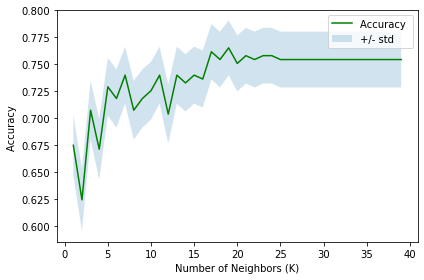

In [16]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc-std_acc, mean_acc+std_acc, alpha=0.2)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [17]:
mean_acc

array([0.67509025, 0.62454874, 0.70758123, 0.67148014, 0.72924188,
       0.71841155, 0.7400722 , 0.70758123, 0.71841155, 0.72563177,
       0.7400722 , 0.70397112, 0.7400722 , 0.73285199, 0.7400722 ,
       0.73646209, 0.76173285, 0.75451264, 0.76534296, 0.75090253,
       0.75812274, 0.75451264, 0.75812274, 0.75812274, 0.75451264,
       0.75451264, 0.75451264, 0.75451264, 0.75451264, 0.75451264,
       0.75451264, 0.75451264, 0.75451264, 0.75451264, 0.75451264,
       0.75451264, 0.75451264, 0.75451264, 0.75451264])

In [18]:
std_acc

array([0.02813989, 0.02909511, 0.02733071, 0.02822003, 0.02669849,
       0.02702428, 0.0263526 , 0.02733071, 0.02702428, 0.02680928,
       0.0263526 , 0.02742866, 0.0263526 , 0.02658546, 0.0263526 ,
       0.02647018, 0.02559726, 0.02585877, 0.02546273, 0.02598583,
       0.02572927, 0.02585877, 0.02572927, 0.02572927, 0.02585877,
       0.02585877, 0.02585877, 0.02585877, 0.02585877, 0.02585877,
       0.02585877, 0.02585877, 0.02585877, 0.02585877, 0.02585877,
       0.02585877, 0.02585877, 0.02585877, 0.02585877])

In [19]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was 0.7653429602888087 with k= 19


# Retrain wuth new K

In [20]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train.values.ravel())  #column vactor to array
#Predict Output
y_pred_tr= knn.predict(X_train)
y_pred_knn= knn.predict(X_test)
print("Accuracy for Train: ", metrics.accuracy_score(y_train, y_pred_tr))
print("Accuracy for Test: ", metrics.accuracy_score(y_test, y_pred_knn))
print('confusion:', confusion_matrix(y_test, y_pred_te))
print('class record:', classification_report(y_test, y_pred_knn))

Accuracy for Train:  0.7971014492753623
Accuracy for Test:  0.740072202166065
confusion: [[  0  68]
 [  0 209]]
class record:               precision    recall  f1-score   support

           0       0.46      0.34      0.39        68
           1       0.80      0.87      0.83       209

    accuracy                           0.74       277
   macro avg       0.63      0.60      0.61       277
weighted avg       0.72      0.74      0.73       277



In [21]:
print("f1_score value =",f1_score(y_test, y_pred_knn, average='weighted') )
print("jaccard index value =",jaccard_similarity_score(y_test, y_pred_knn))

f1_score value = 0.7256126827017375
jaccard index value = 0.740072202166065


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Decison Tree

In [22]:
tr = DecisionTreeClassifier(criterion="entropy", max_depth=4,  min_samples_split=5, random_state=30)
tr.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

In [23]:
y_pred_dt= tr.predict(X_test)


In [24]:
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.32      0.29      0.31        68
           1       0.78      0.79      0.78       209

    accuracy                           0.67       277
   macro avg       0.55      0.54      0.55       277
weighted avg       0.66      0.67      0.67       277

[[ 20  48]
 [ 43 166]]


In [25]:
print("f1_score value =",f1_score(y_test, y_pred_dt, average='weighted') )
print("jaccard index value =",jaccard_similarity_score(y_test, y_pred_dt))

f1_score value = 0.6671522882228434
jaccard index value = 0.6714801444043321


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
predictions = rfc.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.40      0.34      0.37        68
           1       0.80      0.84      0.82       209

    accuracy                           0.71       277
   macro avg       0.60      0.59      0.59       277
weighted avg       0.70      0.71      0.71       277



In [29]:
print(confusion_matrix(y_test,predictions))

[[ 23  45]
 [ 34 175]]


Depends what metric you are trying to optimize for. 
Notice the recall for each class for the models.
Neither did very well, more feature engineering is needed.

# Support Vector Machin

In [30]:
sv = svm.SVC(kernel='rbf')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)

In [31]:

print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.38      0.22      0.28        68
           1       0.78      0.89      0.83       209

    accuracy                           0.72       277
   macro avg       0.58      0.55      0.55       277
weighted avg       0.68      0.72      0.69       277

[[ 15  53]
 [ 24 185]]


In [32]:
print("f1_score value =",f1_score(y_test, y_pred_svm, average='weighted') )
print("jaccard index value =",jaccard_similarity_score(y_test, y_pred_svm))

f1_score value = 0.6933688932284562
jaccard index value = 0.7220216606498195


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Logistic Regression

In [33]:
LR = LogisticRegression(C=0.06, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred_lr  = LR.predict(X_test)
y_pred_lr_prob= LR.predict_proba(X_test)


In [35]:
y_pred_lr_prob = LR.predict_proba(X_test)
print("f1_score value =",f1_score(y_test, y_pred_lr, average='weighted') )
print("jaccard index value =",jaccard_similarity_score(y_test, y_pred_lr))
print('probability', log_loss(y_test, y_pred_lr_prob))

f1_score value = 0.6907318528607574
jaccard index value = 0.7148014440433214
probability 0.5567225672318824


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
